## <span style="color:blue">Introduction to computation in physical sciences</span>
### J Wang and A Wang, [github.com/com-py/intro](https://github.com/com-py/intro) 
### Ch03, `p5-sympy`, Sympy library

In [1]:
from sympy import *
init_printing()  # pretty print math symbols

Constants

In [2]:
pi, E, I, oo

Basic symbolic algebra and calculus

In [3]:
x, a, b, c = symbols('x a b c')
y = a*x*x + b*x + c
y

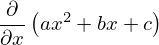

In [4]:
dydx = Derivative(y,x)
dydx

In [5]:
dydx.doit(), y.diff(x)

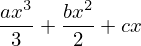

In [6]:
integrate(y, x)

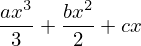

In [7]:
y.integrate(x)

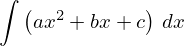

In [8]:
Integral(y, x)

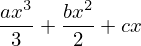

In [9]:
Integral(y, x).doit()

Algebraic solver 

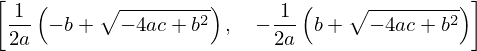

In [10]:
solve(y,x)

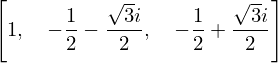

In [11]:
solve(x**3-1,x)

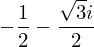

In [12]:
expand(E**(4*pi*I/3), complex=True)

Differential equation solver 

In [13]:
f = Function('f')
k = symbols('k')
dsolve(diff(f(x),x)-k*f(x),f(x)) # diff(f(x),x)==f(x).diff(x)

In [14]:
dsolve(Derivative(f(x),x)-k*f(x),f(x)) # diff(f(x),x)==f(x).diff(x)

In [15]:
dsolve(diff(f(x),x,x)+k*k*f(x),f(x))

Definite integrals

In [16]:
integrate(sin(x)**2/x**2,(x,-oo,oo))

In [17]:
integrate(1/sqrt(x), (x,0,1))

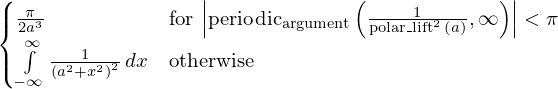

In [18]:
res = integrate(1/(x*x+a*a)**2,(x,-oo,oo))
simplify(res)

In [19]:
a = symbols('a', positive=True)  # specify conditions to help simplify
integrate(1/(x*x+a*a)**2,(x,-oo,oo))

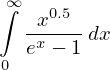

In [20]:
p=0.5
res = Integral(x**p/(exp(x)-1),(x,0,oo))
res

In [21]:
N(res)   # numerical eval

In [22]:
res.n(10)

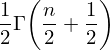

In [23]:
n = symbols('n', integer=True, positive=True)
res = integrate(exp(-x*x) *x**n,(x,0,oo))
res

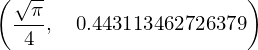

In [24]:
res.subs(n,2), N(res.subs(n,2))

Expansion coefficients, infinite potential well, $\psi=x(a-x)$

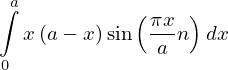

In [25]:
psi = lambda x: x*(a-x)
psin = lambda n, x: sqrt(2/a)*sin(n*pi*x/a)
a = symbols('a', positive=True)
A = Integral(psi(x)**2,(x,0,a))  # norm
cn = Integral(psi(x)*psin(n, x),(x,0,a))/sqrt(A)
cn

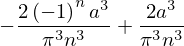

In [26]:
cn = cn.doit()
cn

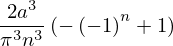

In [27]:
simplify(cn)

In [ ]:
res = Sum(cn**2, (n,1,oo))
res

In [ ]:
res.doit()

In [ ]:
res.doit().n()

Special functions

In [28]:
erf(x), gamma(x), airyai(x), jn(n,x)

In [29]:
plot(airyai(x)) # may need to run twice

<Figure size 640x480 with 1 Axes>

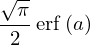

In [30]:
integrate(exp(-x*x),(x,0,a))  # error func

In [31]:
integrate(f(x)*DiracDelta(x-a),(x,-oo,oo))

In [32]:
W = symbols('W')
solve(W*exp(W)-x, W)

Blackbody radiation, Wien's law: $x^3/(\exp(x)-1), x=h\nu/kT$

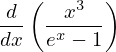

In [33]:
eqn = Derivative(x**3/(exp(x)-1),x)
eqn

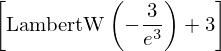

In [34]:
res = solve(eqn.doit(),x)  # freq, x = beta h nu
res

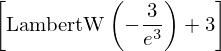

In [35]:
res = solve((x-3)*exp(x)+3,x)  # freq, x = beta h nu
res

In [36]:
N(res[0])

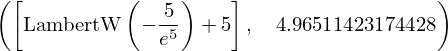

In [37]:
lam = solve((x-5)*exp(x)+5,x)  # wavelength form, x = beta h c /lam
lam, N(lam[0])

Linear equations and eigenvalues

In [38]:
x, y = symbols('x y')
a1, a2 = symbols('a1 a2')
b1, b2 = symbols('b1 b2')
c1, c2 = symbols('c1 c2')
eqns = [a1*x + a2*y-c1, 
        b1*x + b2*y-c2]
eqns

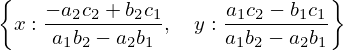

In [39]:
res = solve(eqns, x, y)
res

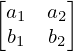

In [40]:
A = Matrix([[a1,a2],[b1,b2]])
A

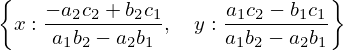

In [41]:
solve(A*Matrix([x, y])-Matrix([c1, c2]), Matrix([x, y]))

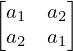

In [42]:
B = A.subs([[b1,a2], [b2,a1]])   # symmetric matrix
B

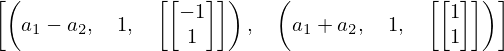

In [43]:
B.eigenvects()

Physics module: Quantum simple harmonic oscillator

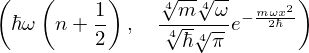

In [44]:
from sympy.physics.qho_1d import E_n, psi_n, hbar
n = symbols('n', integer=True, positive=True)
m, omega = symbols('m omega', positive=True)
x, a = symbols('x a')
E_n(n, omega), psi_n(0,x,m,omega)

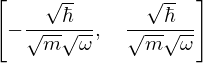

In [45]:
V = m*omega**2 * x**2/2
tp = solve(E_n(0, omega)-V, x)  # turning points
tp

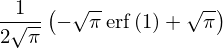

In [46]:
prob = Integral(psi_n(0,x,m,omega)**2, (x,tp[1],oo))
res = prob.doit()
res

In [47]:
2*N(res)

Physics module: Hydrogen atom

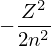

In [48]:
from sympy.physics.hydrogen import E_nl, R_nl
n, l = symbols('n l', integer=True, positive=True)
Z, r = symbols('Z r', positive=True)
E_nl(n,Z)

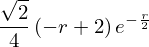

In [49]:
R_nl(2,0,r)

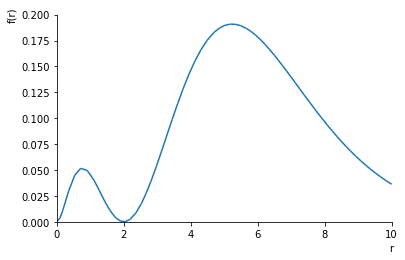

In [50]:
plot((r*R_nl(2,0,r))**2, (r,0,10))  # may have to run the cell again

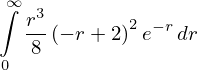

In [51]:
res = Integral(R_nl(2,0,r)**2*r**3,(r,0,oo)) # <r>
res

In [52]:
res.doit()

In [53]:
res = Integral(R_nl(2,0,r)**2*r,(r,0,oo))  # <1/r>
res.doit()

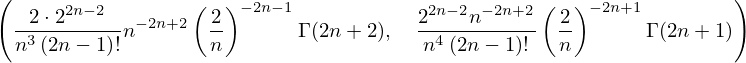

In [54]:
integrate(R_nl(n,n-1,r)**2*r**3,(r,0,oo)), integrate(R_nl(n,n-1,r)**2*r,(r,0,oo))

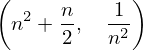

In [55]:
simplify(_)